# Solar Power Generation Predictive Data Analysis - Machine Learning Terapan Submission #1




*   Nama: Muhammad Reiyan Indra
*   Asal: Tangerang Selatan, Banten
*  Project Theme: Predictive Analysis in Solar Power Generation



## Project Domain

This project focuses on the management and optimization of solar power plants in India. The data used in this project was collected from two solar power plants over a 34-day period. There are two types of data collected: power generation data at the inverter level and sensor data at the plant level. Each inverter has multiple lines of solar panels connected to it, while the sensor data is collected from a single array of sensors optimally placed throughout the plant. By using the available data, this project aims to provide valuable insights to enhance the efficiency and performance of solar power plants through more accurate predictions, timely maintenance, and identification of equipment issues.


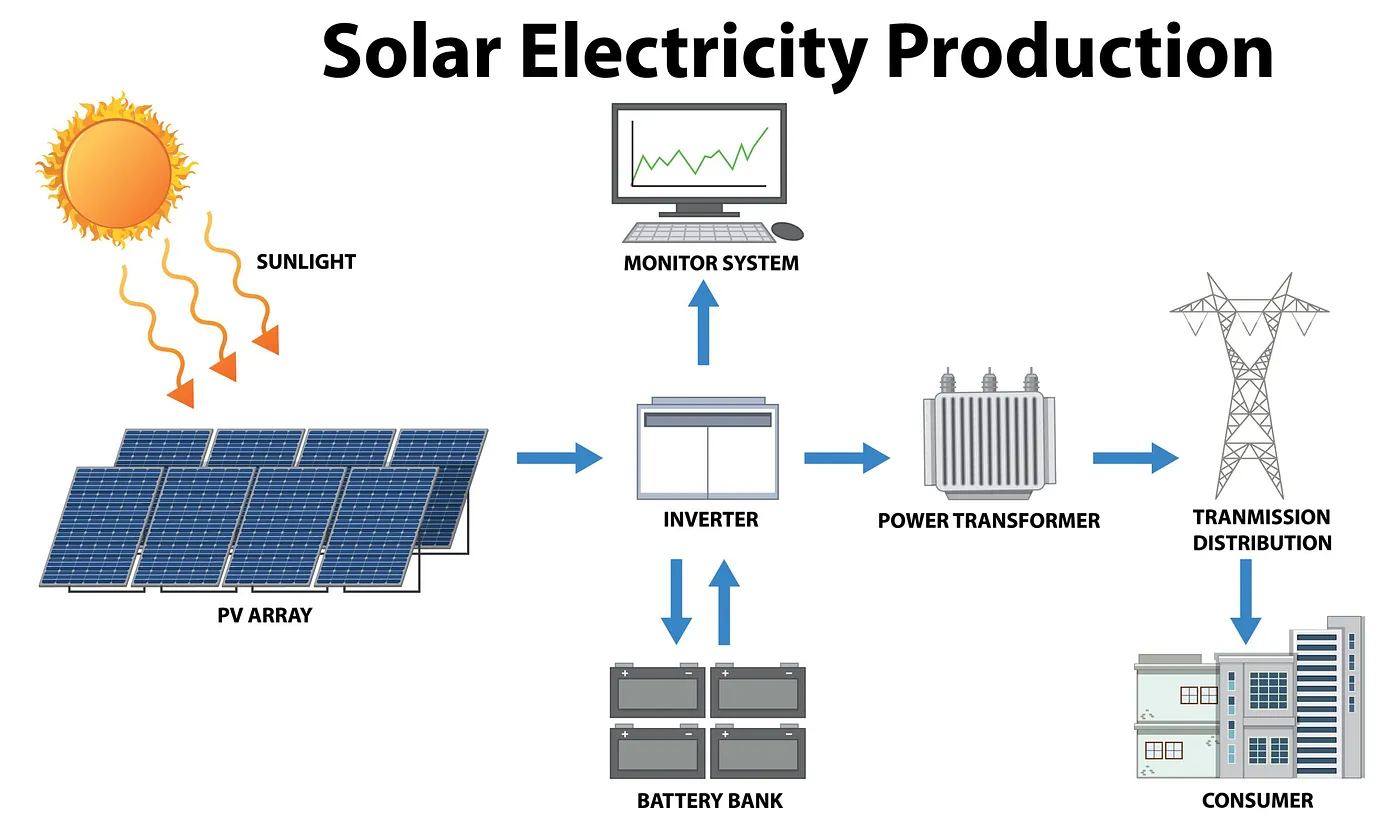

Source: [How is the electricity generated by a solar power plant distributed to consumers?](https://https://medium.com/@Breadarose/how-is-the-electricity-generated-by-a-solar-power-plant-distributed-to-consumers-b684c3c304f3)

## Business Understanding

### Problem Statement
From the business perspective outlined above, we aim to address:
*  Can we achieve precise predictions of energy production from solar panels over the next couple of days?
*  How do variations in inverter efficiencies impact the overall prediction of energy production?
  
### Goals
Our objectives are:
*  Accurately forecast energy production from solar panels by incorporating inverter power values, temperature readings, and irradiation data.
*  Implement robust evaluation methods to validate the accuracy and reliability of our predictive models across varying conditions.
  
### Solutions
To achieve these goals, we will:
*  Select appropriate machine learning prediction models, considering the dataset's characteristics and objectives.

These steps are designed to enhance our ability to forecast solar panel energy production effectively, accounting for the variability in inverter efficiencies and ensuring the reliability of our predictive models under diverse environmental conditions.

## Data Understanding



The dataset used for this project can be downloaded from [Kaggle](https://www.kaggle.com/datasets/anikannal/solar-power-generation-data/data). This dataset contains 68,773 records and 9 variables. It consists of two datasets: *Plant_1_Generation_Data.csv* and *Plant_1_Weather_Sensor_Data.csv*. Each dataset contains similar variables, but with important differences: the first dataset (Plant_1_Generation_Data) includes power and yield values, while the second dataset (Plant_1_Weather_Sensor_Data) includes solar panel temperature and irradiance values. Below is a detailed explanation of each variable:
*   `DATE_TIME` : Date and time for each observation
*   `PLANT_ID`
*   `SOURCE_KEY`: Inverter ID
*   `DC_POWER`: Amount of DC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.
*   `AC_POWER`: Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.
*   `DAILY_YIELD`:  a cumulative sum of power generated on that day, till that point in time.
*   `TOTAL_YIELD`:  total yield for the inverter till that point in time.
*   `AMBIENT_TEMPERATURE`: the ambient temperature at the plant.
*   `MODULE_TEMPERATURE`: There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.
*   `IRRADIATION`: Amount of irradiation (W/m<sup>2</sup>) for the 15 minute interval.









Load & Prepare the Datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
generation_data = pd.read_csv('/content/gdrive/MyDrive/ML Projects/Data Analysis/Power Generation/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('/content/gdrive/MyDrive/ML Projects/Data Analysis/Power Generation/Plant_1_Weather_Sensor_Data.csv')

Data Overview

In [4]:
generation_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [5]:
generation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [6]:
generation_data.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [7]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [8]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [9]:
weather_data.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


Change to DateTime Column and Merge Two Datasets

In [10]:
# Ensure the DATE_TIME columns are of the same type
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Drop the specified columns and merge the DataFrames
generation_weather = pd.merge(
    generation_data.drop(columns=['PLANT_ID']),
    weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']),
    on='DATE_TIME'
)


<ipython-input-10-22fbddb16d8c>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])


In [11]:
generation_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   TOTAL_YIELD          68774 non-null  float64       
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.7+ MB


In [12]:
generation_weather.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0


Looking for null and missing values

In [13]:
generation_weather.isna().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [14]:
generation_weather.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,68774,68774.000000,68774.000000,68774.000000,6.877400e+04,68774.000000,68774.000000,68774.000000
mean,2020-06-01 08:02:38.161514240,3147.177450,307.778375,3295.834644,6.978728e+06,25.558521,31.244997,0.232305
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000
25%,2020-05-24 00:33:45,0.000000,0.000000,0.000000,6.512007e+06,22.724491,21.123944,0.000000
50%,2020-06-01 14:15:00,428.571429,41.450000,2658.473214,7.146685e+06,24.670178,24.818984,0.031620
75%,2020-06-09 20:00:00,6365.468750,623.561161,6274.000000,7.268751e+06,27.960429,41.693659,0.454880
max,2020-06-17 23:45:00,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652
std,NaN,4036.441826,394.394865,3145.220597,4.162707e+05,3.361300,12.308283,0.301948


In [15]:
generation_weather.shape

(68774, 9)

In [16]:
DC_POWER = (generation_weather.DC_POWER == 0).sum()
AC_POWER = (generation_weather.AC_POWER == 0).sum()
DAILY_YIELD = (generation_weather.DAILY_YIELD == 0).sum()
IRRADIATION = (generation_weather.IRRADIATION == 0).sum()

In [17]:
print('Null Values in DC_POWER', DC_POWER)
print('Null Values in AC_POWER', AC_POWER)
print('Null Values in DAILY_YIELD', DAILY_YIELD)
print('Null Values in IRRADIATION', IRRADIATION)

Null Values in DC_POWER 31951
Null Values in AC_POWER 31951
Null Values in DAILY_YIELD 18696
Null Values in IRRADIATION 30398


In [18]:
generation_weather.loc[(generation_weather['DC_POWER']==0)]

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


In [19]:
generation_weather = generation_weather.loc[(generation_weather[['DC_POWER',
                                                                 'AC_POWER',
                                                                 'DAILY_YIELD',
                                                                 'IRRADIATION']]!=0).all(axis=1)]
generation_weather.shape

(36685, 9)

Handling Outliers // Univariate Analysis

<Axes: xlabel='DC_POWER'>

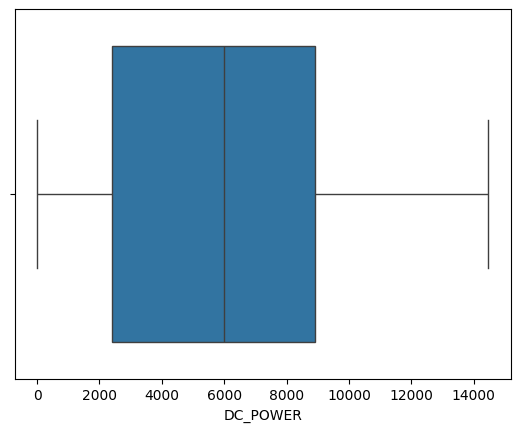

In [20]:
sns.boxplot(x=generation_weather['DC_POWER'])

<Axes: xlabel='AC_POWER'>

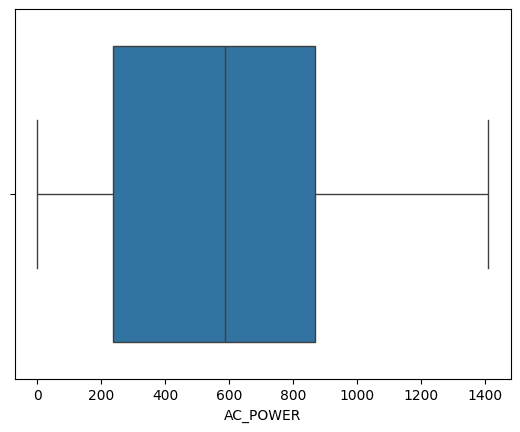

In [21]:
sns.boxplot(x=generation_weather['AC_POWER'])

<Axes: xlabel='DAILY_YIELD'>

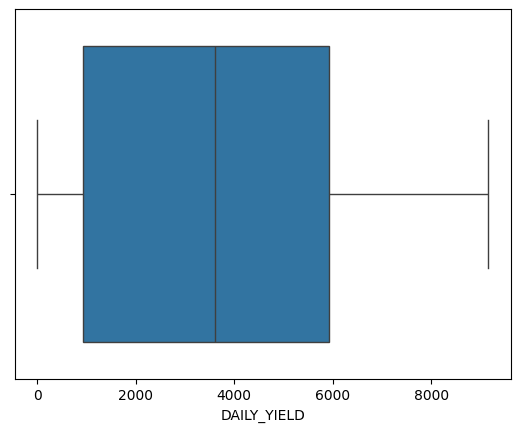

In [22]:
sns.boxplot(x=generation_weather['DAILY_YIELD'])

<Axes: xlabel='TOTAL_YIELD'>

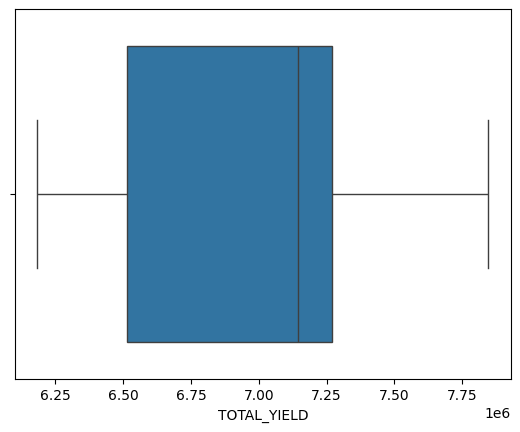

In [23]:
sns.boxplot(x=generation_weather['TOTAL_YIELD'])

<Axes: xlabel='AMBIENT_TEMPERATURE'>

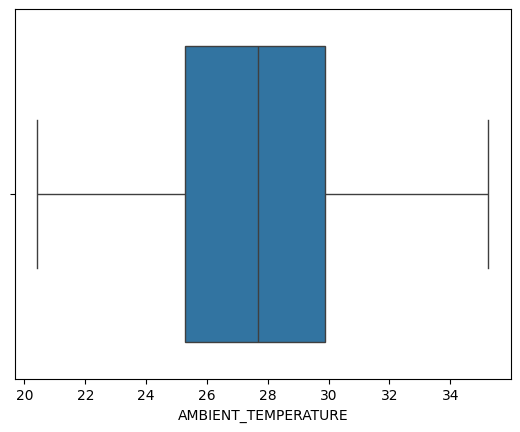

In [24]:
sns.boxplot(x=generation_weather['AMBIENT_TEMPERATURE'])

<Axes: xlabel='MODULE_TEMPERATURE'>

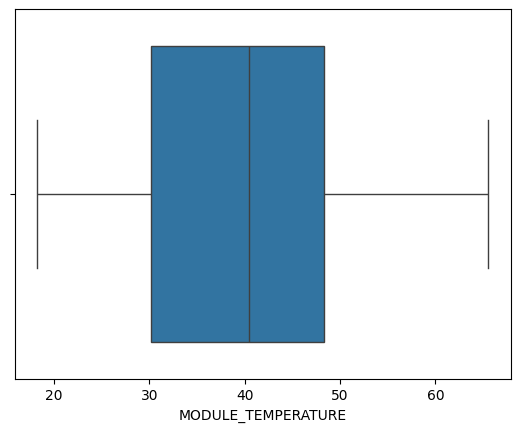

In [25]:
sns.boxplot(x=generation_weather['MODULE_TEMPERATURE'])

<Axes: xlabel='IRRADIATION'>

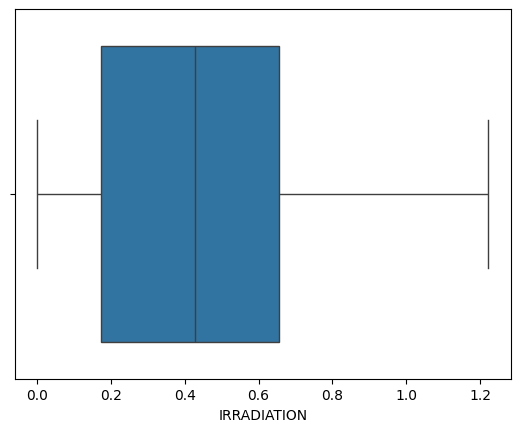

In [26]:
sns.boxplot(x=generation_weather['IRRADIATION'])

#### EDA Univariate Analysis

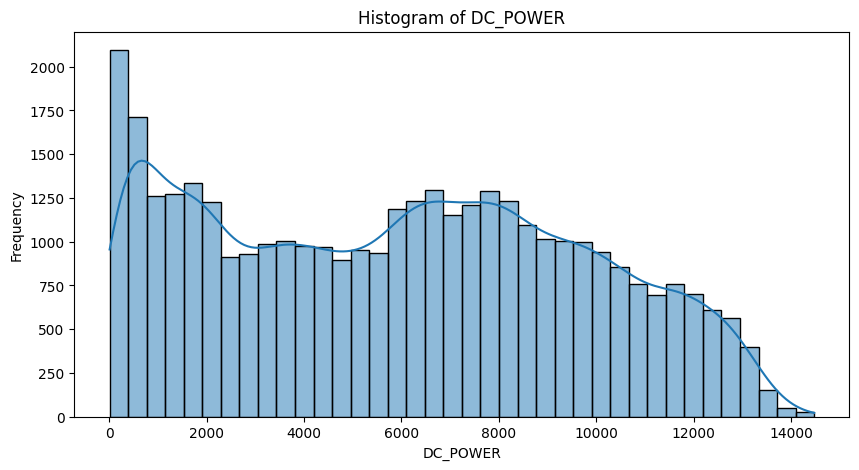

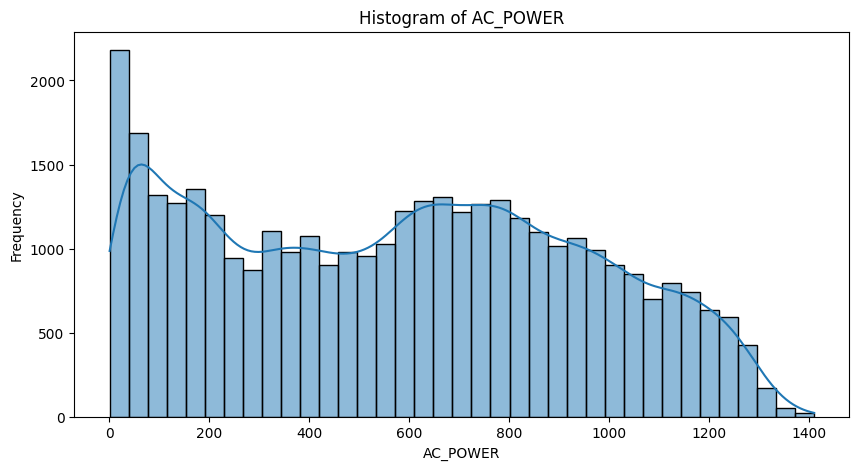

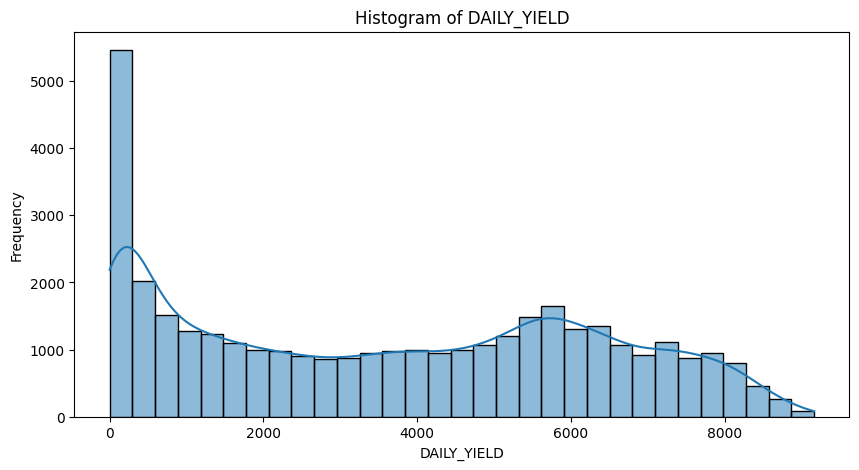

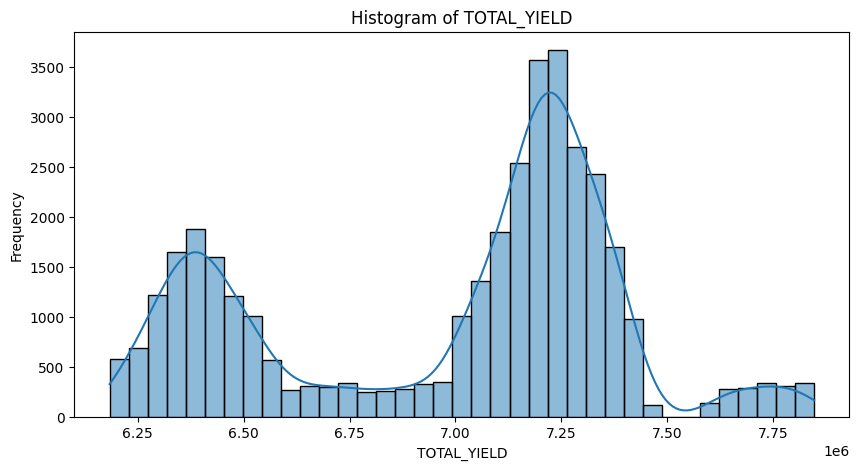

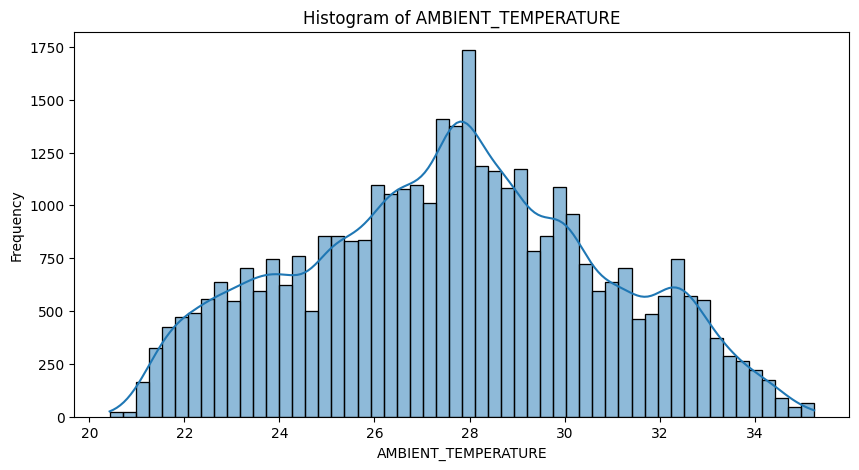

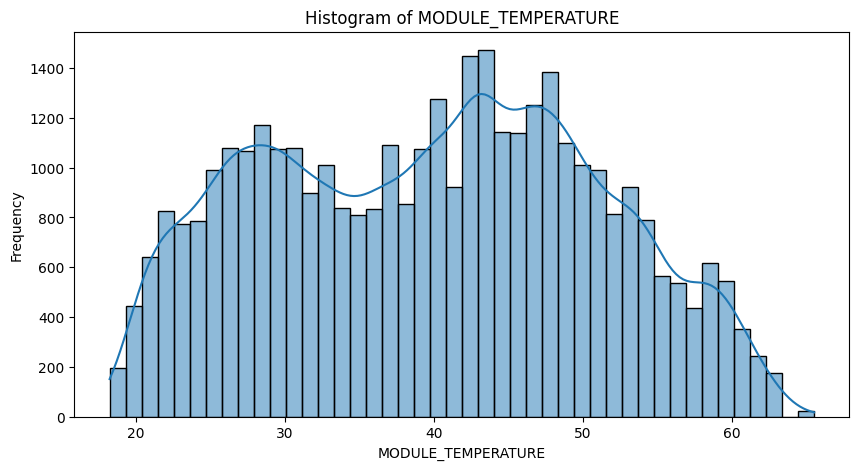

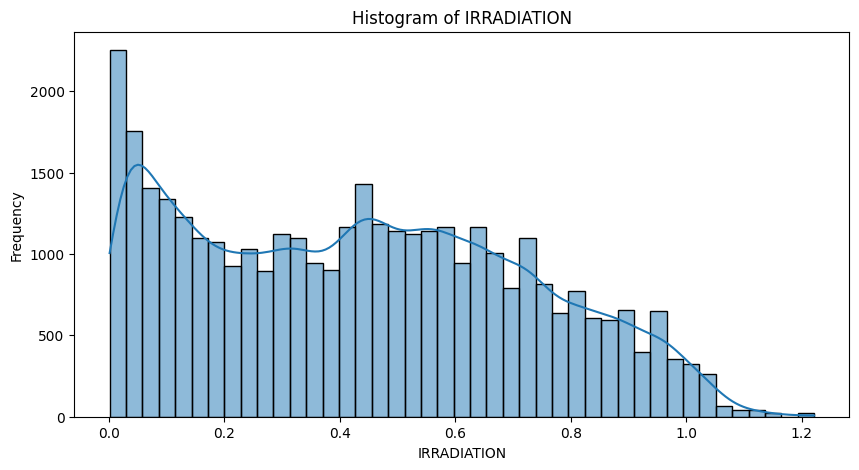

In [27]:
# List of numeric columns for analysis
numeric_cols = [
    'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD',
    'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'
]
for col in numeric_cols:
    plt.figure(figsize=(10, 5))

    # Histogram
    sns.histplot(generation_weather[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.show()

In [28]:
generation_weather['DATE_TIME'] = pd.to_datetime(generation_weather['DATE_TIME'])
average_daily_yield_plant = generation_weather.groupby(generation_weather['DATE_TIME'].dt.date)['DAILY_YIELD'].mean()

sorted_average_daily_yield = average_daily_yield_plant.sort_values(ascending=False)
sorted_average_daily_yield

DATE_TIME
2020-05-25    4559.795566
2020-05-21    4526.241566
2020-05-23    4493.853580
2020-06-13    4300.075407
2020-05-28    4297.857403
2020-06-08    4168.156397
2020-06-09    4060.425258
2020-05-29    4046.549606
2020-05-24    4024.256569
2020-05-26    3952.807278
2020-06-04    3942.007855
2020-05-17    3871.108434
2020-06-07    3810.465497
2020-06-03    3749.603626
2020-06-05    3723.200850
2020-06-02    3692.370251
2020-06-14    3607.786370
2020-06-15    3591.545240
2020-05-22    3540.731634
2020-05-27    3396.578564
2020-06-06    3392.663275
2020-05-30    3352.923214
2020-06-01    3316.229706
2020-05-16    3310.001484
2020-06-16    3307.440209
2020-06-17    3297.144513
2020-06-10    3247.386085
2020-05-31    3187.138576
2020-05-19    3120.413873
2020-05-15    3063.642435
2020-05-20    3008.221630
2020-06-12    2884.405860
2020-06-11    2679.470049
2020-05-18    2317.073836
Name: DAILY_YIELD, dtype: float64

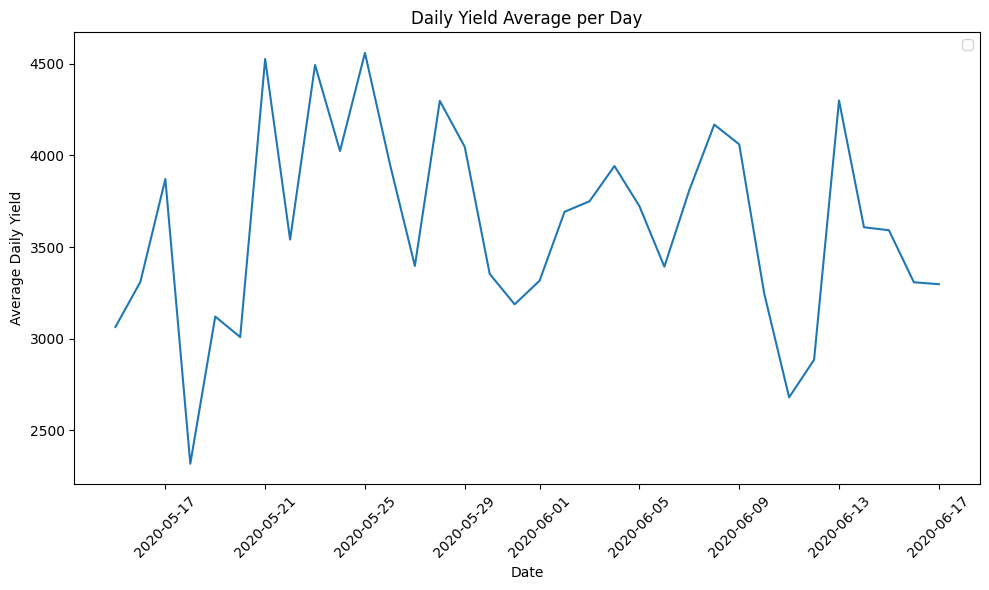

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(average_daily_yield_plant.index, average_daily_yield_plant.values)

# Adding titles and labels
plt.title('Daily Yield Average per Day')
plt.xlabel('Date')
plt.ylabel('Average Daily Yield')
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

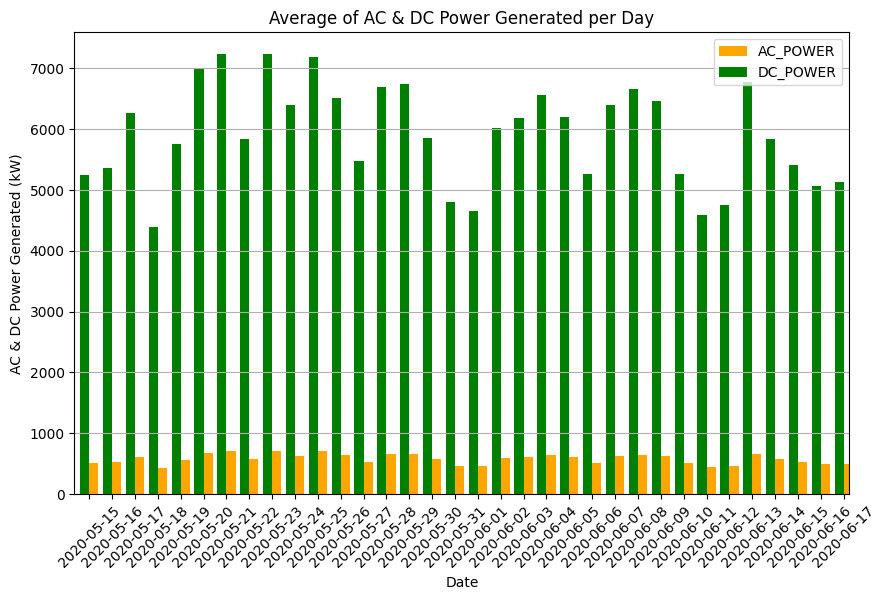

In [30]:
ac_power_per_day = generation_weather.groupby(generation_weather['DATE_TIME'].dt.date)['AC_POWER'].mean()
dc_power_per_day = generation_weather.groupby(generation_weather['DATE_TIME'].dt.date)['DC_POWER'].mean()

plt.figure(figsize=(10,6))

ac_power_per_day.plot(kind='bar', color='orange', position=0, width=0.4, label='AC_POWER')
dc_power_per_day.plot(kind='bar', color='green', position=1, width=0.4, label='DC_POWER')

plt.title('Average of AC & DC Power Generated per Day')
plt.xlabel('Date')
plt.ylabel('AC & DC Power Generated (kW)')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.legend()
plt.show()

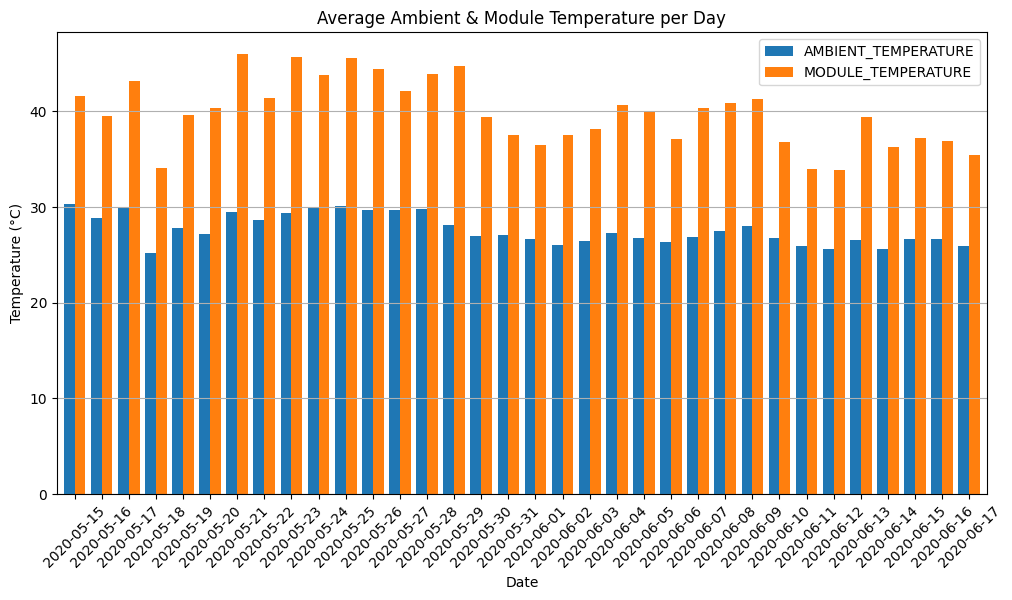

In [31]:
# Group by date and calculate the average temperatures for each day
ambient_temperature_per_day = generation_weather.groupby(generation_weather['DATE_TIME'].dt.date)['AMBIENT_TEMPERATURE'].mean()
module_temperature_per_day = generation_weather.groupby(generation_weather['DATE_TIME'].dt.date)['MODULE_TEMPERATURE'].mean()

# Create a DataFrame to combine both series
temperature_df = pd.DataFrame({
    'AMBIENT_TEMPERATURE': ambient_temperature_per_day,
    'MODULE_TEMPERATURE': module_temperature_per_day
})

# Plotting average ambient and module temperatures per day
plt.figure(figsize=(12, 6))

temperature_df.plot(kind='bar', width=0.8, ax=plt.gca())

plt.title('Average Ambient & Module Temperature per Day')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.legend()
plt.show()


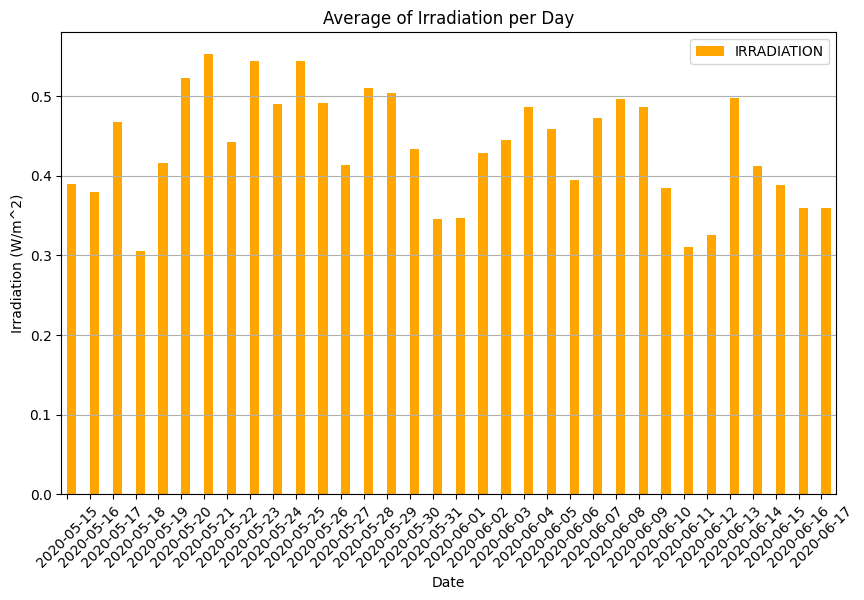

In [32]:
irradiation_per_day = generation_weather.groupby(generation_weather['DATE_TIME'].dt.date)['IRRADIATION'].mean()

plt.figure(figsize=(10,6))

irradiation_per_day.plot(kind='bar', color='orange', position=0, width=0.4)
plt.title('Average of Irradiation per Day')
plt.xlabel('Date')
plt.ylabel('Irradiation (W/m^2)')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.legend()
plt.show()

#### Multivariate Analysis

Since the datasets lack categorical features, we will continue analyzing the different types of variables numerically by plotting the correlation graph and heatmap.

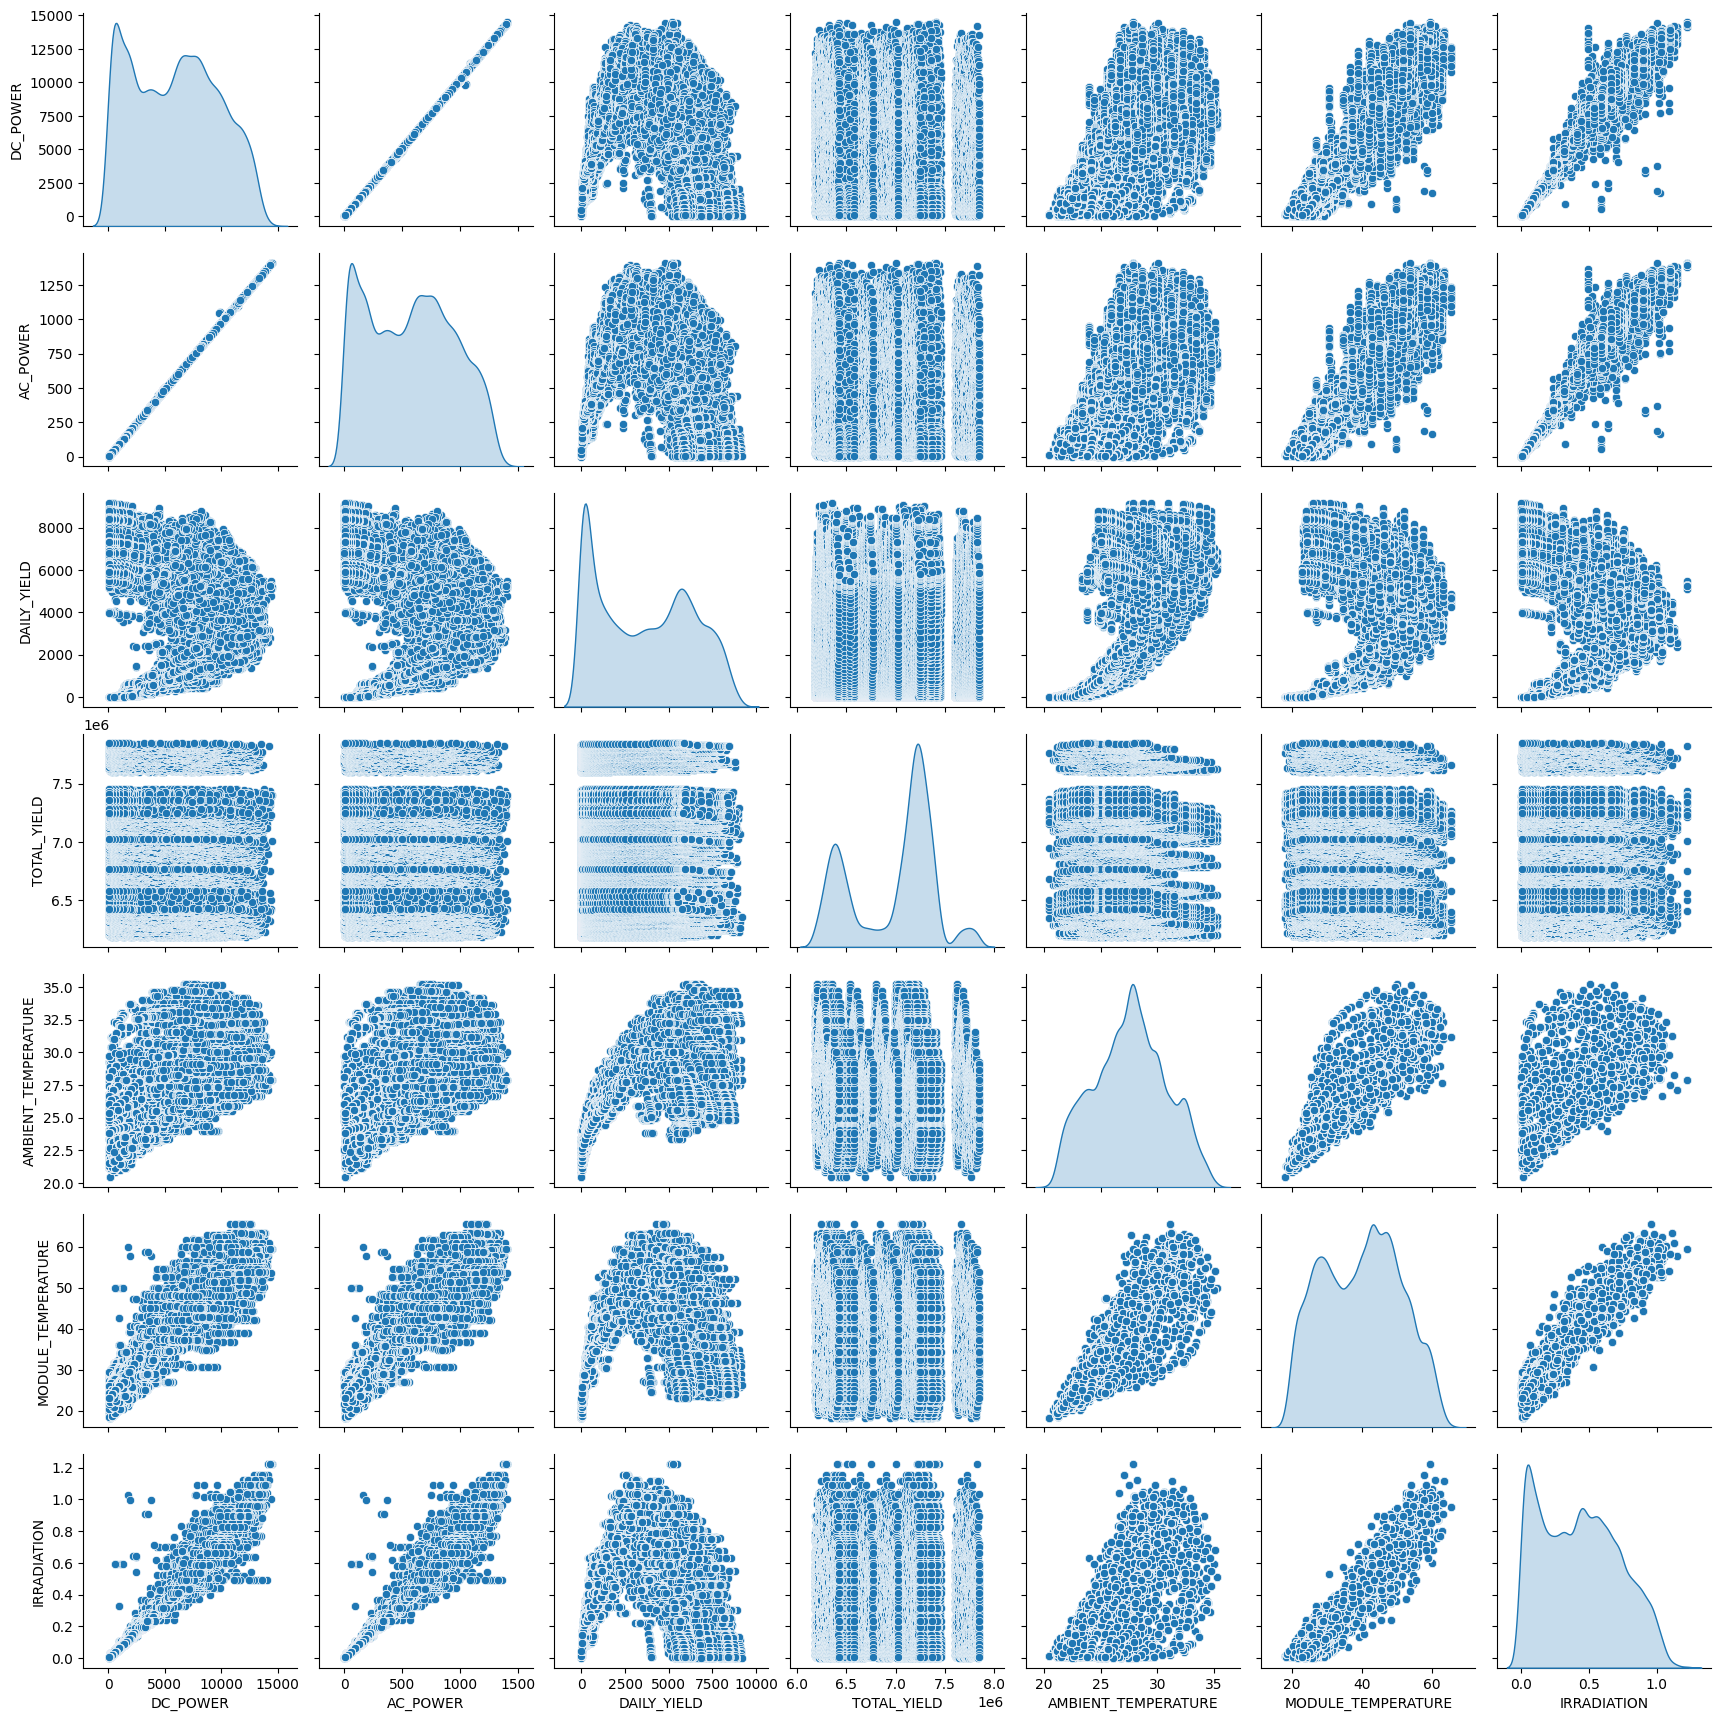

In [33]:
sns.pairplot(generation_weather, diag_kind='kde')

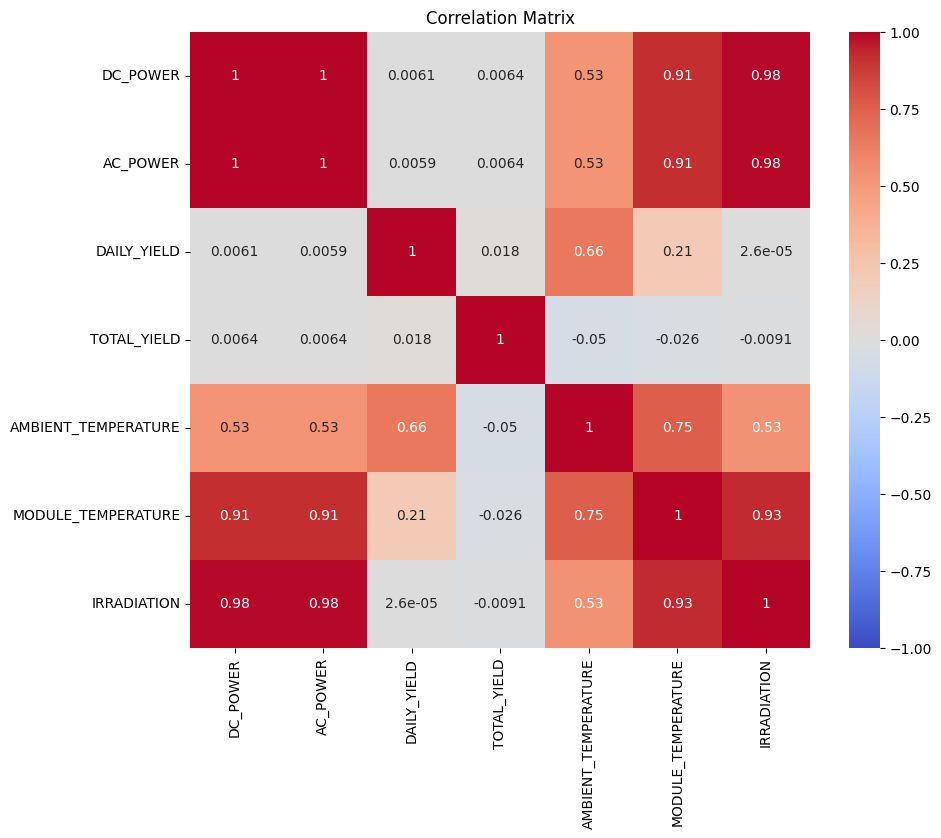

In [34]:
corr_matrix = generation_weather[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix, it can be concluded that there is little correlation between `TOTAL_YIELD` and `AMBIENT_TEMPERATURE`, `MODULE_TEMPERATURE`, and `IRRADIATION`.

## Data Preparation

Since we do not have categorical values, we will not use one-hot encoding methods. Instead, we will continue to split the data into training and test sets, with 90% for training and 10% for testing. Additionally, we will implement standardization to transform the features into a format that is more easily processed by algorithms. Standardization is the most commonly used transformation technique in the modeling preparation stage.

In [35]:
generation_weather_ml = generation_weather.copy()
X = generation_weather[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']]
y = generation_weather['AC_POWER']

In [36]:
X

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
531,2.625000,6259561.625,24.011635,22.353459,0.022282
532,3.000000,6183648.000,24.011635,22.353459,0.022282
533,3.500000,6987762.500,24.011635,22.353459,0.022282
534,3.500000,7602963.500,24.011635,22.353459,0.022282
535,3.142857,7158967.143,24.011635,22.353459,0.022282
...,...,...,...,...,...
68307,5966.142857,7287001.143,23.840239,22.968658,0.007007
68308,5882.714286,7028600.714,23.840239,22.968658,0.007007
68309,5818.428571,7251203.429,23.840239,22.968658,0.007007
68310,5816.142857,6583368.143,23.840239,22.968658,0.007007


In [37]:
y

531      26.862500
532      30.014286
533      30.775000
534      30.562500
535      30.100000
           ...    
68307     7.614286
68308     7.300000
68309     7.471429
68310     7.228571
68311     7.485714
Name: AC_POWER, Length: 36685, dtype: float64

###Train-Test-Split Method

Due to the large size of the dataset, the train-test-split method will allocate 90% for training and 10% for testing.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

Total of the overall dataset, training data, and test data are as follows:

In [39]:
print(f'Total samples in whole dataset: {len(X)}')
print(f'Total samples in train dataset: {len(X_train)}')
print(f'Total samples in test dataset: {len(X_test)}')

Total samples in whole dataset: 36685
Total samples in train dataset: 33016
Total samples in test dataset: 3669


In [40]:
print(X_train.columns)


Index(['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')


### Standardization

Standardization is the most commonly used transformation technique in the modeling preparation stage. For numerical features, we will not perform transformation using one-hot encoding like we do for categorical features. Instead, we will use the StandardScaler technique from the Scikit-learn library.

In [41]:
from sklearn.preprocessing import StandardScaler

numeric_cols = [
    'DAILY_YIELD', 'TOTAL_YIELD',
    'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'
]

scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train.loc[:, numeric_cols])
X_train[numeric_cols].head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
54740,-1.275658,0.508053,-1.501805,-1.127076,-0.922511
49038,1.234104,-1.099721,1.032475,0.913415,1.094090
20771,1.919999,0.524697,1.035638,-0.809017,-1.382765
14188,-0.256534,0.603525,0.934067,1.877543,2.138809
2665,-0.784902,0.304225,-0.002190,0.565099,0.201034


StandardScaler standardizes features by subtracting the mean (average value) and then dividing by the standard deviation to shift the distribution. It produces a distribution with a standard deviation of 1 and a mean of 0. Approximately 68% of the values will fall between -1 and 1.

In [42]:
X_train[numeric_cols].describe().round(4)

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,33016.0000,33016.0000,33016.0000,33016.0000,33016.0000
mean,-0.0000,-0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.3471,-1.9127,-2.2651,-1.9431,-1.5053
25%,-1.0028,-1.1181,-0.7261,-0.8706,-0.9043
50%,-0.0039,0.4023,0.0182,0.0570,-0.0200
75%,0.8557,0.6952,0.7156,0.7644,0.7678
max,2.0589,2.0854,2.4044,2.3208,2.7445


### Model Development

Here are the types of model development that might be appropriate for data prediction:
*  KNN (k-nearest neighbors)
*  Random Forest
*  Boost Regressor
*  Linear Regression
*  SVR (Support Vector Regression)

In [43]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting', 'LinearRegression', 'SVR'])

####KNN Neighbors

**KNN (K-nearest Neighbors)** is a relatively simple algorithm compared to others. It uses 'feature similarity' to predict the value of new data points. In other words, each new data point is assigned a value based on how similar it is to points in the training set. KNN works by comparing the distance of a sample to other training samples and selecting the k nearest neighbors (where k is a positive integer).

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Here, the parameter `n_neighbors` is set to 10, which means the algorithm will consider the 10 nearest neighbors. The parameter will then take the data from these 10 closest samples to create a new data point.

#### Random Forest Regressor

**Random Forest** is an ensemble learning method used for classification, regression, and other tasks. It operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [45]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Here, the parameter `n_estimators` is set to 50, which means it will create 50 tree branches, with a maximum depth of 16.

#### Boost Regressor

A **Boost Regressor**, also known as a boosting algorithm in regression tasks, is an ensemble learning technique that combines the predictions of several base estimators (usually weak learners) to improve the overall prediction accuracy.

In [46]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Here, we are using a learning_rate parameter of 0.05, which means the model will be trained with a learning rate of 0.05 and with a random_state of 55.

#### Linear Regression

**Linear regression** is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.

In [47]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
models.loc['train_mse', 'LinearRegression'] = mean_squared_error(y_pred=lr_model.predict(X_train), y_true=y_train)

#### Support Vector Regression

**Support Vector Regression (SVR)** is a supervised learning algorithm that applies the principles of Support Vector Machines (SVM) to regression tasks. It finds the best-fit line within a specified margin of tolerance (epsilon) and aims to minimize the prediction error by using a subset of the training data called support vectors. The goal is to create a model that predicts continuous values while maintaining robustness against outliers.

In [48]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
models.loc['train_mse', 'SVR'] = mean_squared_error(y_pred=svr.predict(X_train), y_true=y_train)


Here, SVR is initialized with a radial basis function (RBF) kernel, C=100 for regularization strength, gamma=0.1 for kernel coefficient, and epsilon=0.1 for the margin of tolerance.

## Model Evaluation

The evaluation metric we will use for this prediction is MSE or Mean Squared Error, which calculates the average of the squared differences between actual values and predicted values. MSE is defined by the following equation:
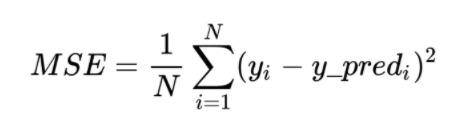



Model Performance Comparison Results:

In [49]:
X_test.loc[:, numeric_cols] = scaler.transform(X_test[numeric_cols])

In [50]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting', 'LinearRegression', 'SVR'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting, 'LinearRegression': lr_model, 'SVR':svr}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

# Panggil mse
mse

,train,test
KNN,2569.979923,3400.414956
RF,639.088477,2514.978222
Boosting,4608.368898,4943.855889
LinearRegression,4123.071216,4448.260969
SVR,3229.136262,3558.068768


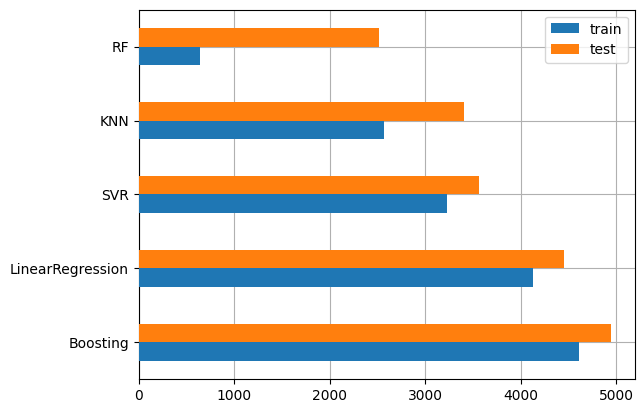

In [51]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [55]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediction_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediction_KNN,prediction_RF,prediction_Boosting,prediction_LinearRegression,prediction_SVR
14713,48.6375,57.0,49.9,48.0,78.2,51.2


Based on the training and test scores for each model, **Random Forest (RF)** performs the best with the lowest error on both training and test sets, indicating strong performance and potential robustness in generalization. It emerges as the most promising model, demonstrating lower errors and balanced performance across training and test sets. Furthermore, it can be seen from the table that predictions using Random Forest approach the y values with differences that are quite close.

This can also be measured by the R2 value, where Random Forest has a higher value compared to KNN, Boosting, Linear Regression, and SVR, indicating that Random Forest is highly effective in predicting values.

In [54]:
from sklearn.metrics import r2_score
knn_test_pred = knn.predict(X_test)
forest_test_pred = RF.predict(X_test)
boosting_test_pred = boosting.predict(X_test)
lr_test_pred = lr_model.predict(X_test)
svr_test_pred = svr.predict(X_test)

print("R2 score KNN : ", r2_score(y_test, knn_test_pred))
print("R2 score RF : ", r2_score(y_test, forest_test_pred))
print("R2 score Boosting : ", r2_score(y_test, knn_test_pred))
print("R2 score Linear Regression: ", r2_score(y_test, lr_test_pred))
print("R2 score SVR: ", r2_score(y_test, svr_test_pred))

R2 score KNN :  0.9752660010210168
R2 score RF :  0.9817065065396017
R2 score Boosting :  0.9752660010210168
R2 score Linear Regression:  0.9676441599956099
R2 score SVR:  0.9741192559121683
